# Visu 8: Width histogram

In [133]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

# Setup

In [100]:
import os
import matplotlib.pyplot as plt
import random
import json
import pandas as pd
import numpy as np

from amftrack.util.sys import storage_path
from amftrack.util.image_analysis import convert_to_micrometer

# Close up x100 images

## Presentation

**Data**:
106 pictures taken at 100x magnification of hyphae in one plate.\
All types of hyphea (big runner, runner, bas, ..) are represented.\
The width is then labeled with `labelme`.

**Plate**:
The plate is plate number 1050.\
It is of strain C2. Treatment is 100C.\
The crossing was observed on 09/05.

**Conclusion**:
Values go from 2.3 to 12.5 micrometers.\
Median is 4.7 micrometers.

## Plate overview

## Get data

Fetch segments

In [101]:
source = os.path.join(storage_path, "plate1050_width")

def is_valid(name):
    return ".json" in name

segments = {}
for file in os.listdir(source):
    if is_valid(file):
        path = os.path.join(source, file)
        with open(path) as f:
            json_from_file = json.load(f)
        for shape in json_from_file["shapes"]:
            if shape["label"] == "width":
                segments[file] = shape["points"]

Convert setgment to width

In [102]:
labels = {}

for key in segments.keys():
    point1 = np.array(segments[key][0])
    point2 = np.array(segments[key][1])
    length = convert_to_micrometer(
                np.linalg.norm(point1 - point2), magnification=100
            )
    labels[key] = length

## Data visualisation

In [103]:
values = [labels[key] for key in labels.keys()]

(array([ 8., 15., 10.,  6.,  8., 12., 11., 11.,  6.,  6.,  7.,  0.,  1.,
         0.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 2.28162126,  2.7267886 ,  3.17195593,  3.61712327,  4.06229061,
         4.50745795,  4.95262529,  5.39779263,  5.84295997,  6.2881273 ,
         6.73329464,  7.17846198,  7.62362932,  8.06879666,  8.513964  ,
         8.95913134,  9.40429867,  9.84946601, 10.29463335, 10.73980069,
        11.18496803, 11.63013537, 12.07530271, 12.52047004]),
 <a list of 23 Patch objects>)

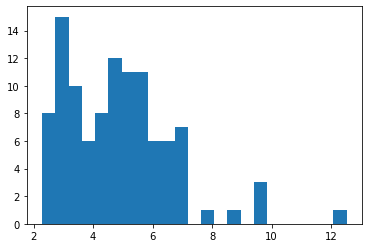

In [104]:
plt.hist(values, bins = 23)

In [105]:
serie = pd.Series(values)

In [106]:
serie.describe()

count    106.000000
mean       4.819916
std        1.801394
min        2.281621
25%        3.308409
50%        4.714272
75%        5.755497
max       12.520470
dtype: float64

# Prince x2 images

## Setup

In [107]:
def fetch_label(path_to_labels):
    def is_valid(name):
        return ".json" in name

    segments_new = []
    for file in os.listdir(path_to_labels):
        if is_valid(file):
            path = os.path.join(path_to_labels, file)
            with open(path) as f:
                json_from_file = json.load(f)
            for shape in json_from_file["shapes"]:
                if shape["label"] == "width":
                    segments_new. append(shape["points"])
    return segments_new

In [108]:
def convert_segments_to_width(segments_new):
    labels = []
    for segment in segments_new:
        point1 = np.array(segment[0])
        point2 = np.array(segment[1])
        length = convert_to_micrometer(
                    np.linalg.norm(point1 - point2), magnification=2
                )
        labels.append(length)
    return labels

## C2

### Presentation

Both plate are C2

**Old plate**\
Is a plate that crossed a while ago.\
It has 70 points.

**New plate**\
Is a plate that crossed recently.\
It has 150 points.

**Conclusion**\
The values range between 2.4 and 15.2 for old plate and between 2.5 and 7.8 for the new plate.\
Which makes sense that the older plate would have some thicker hyphas.\
Most values are found between 3 and 8 micrometers.\
Those values are consistent with the values observed on the plate at 100x.

In [109]:
old_plate = os.path.join(storage_path, "labels_precise", "20220527_0153_Plate08", "Img")
new_plate = os.path.join(storage_path, "labels_precise", "20220527_0332_Plate01", "Img")

### Old plate

In [110]:
segments_new = fetch_label(old_plate)
labels = convert_segments_to_width(segments_new)

In [111]:
len(labels)

70

(array([ 4.,  8., 19., 10.,  6.,  4.,  2.,  3.,  2.,  3.,  0.,  1.,  1.,
         0.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  2.,  1.]),
 array([ 2.39205357,  2.95064039,  3.50922722,  4.06781405,  4.62640088,
         5.1849877 ,  5.74357453,  6.30216136,  6.86074819,  7.41933501,
         7.97792184,  8.53650867,  9.0950955 ,  9.65368232, 10.21226915,
        10.77085598, 11.32944281, 11.88802963, 12.44661646, 13.00520329,
        13.56379012, 14.12237694, 14.68096377, 15.2395506 ]),
 <a list of 23 Patch objects>)

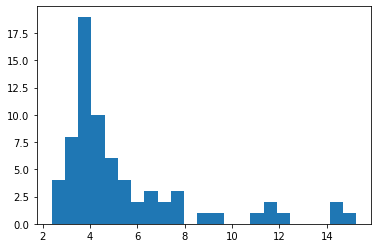

In [112]:
plt.hist(labels, bins = 23)

In [113]:
serie = pd.Series(labels)

In [114]:
serie.describe()

count    70.000000
mean      5.454233
std       2.941387
min       2.392054
25%       3.688637
50%       4.210676
75%       6.117486
max      15.239551
dtype: float64

### Young plate

In [115]:
segments_new = fetch_label(new_plate)
labels = convert_segments_to_width(segments_new)

In [116]:
len(labels)

154

(array([ 2.,  0.,  4., 10., 10.,  9.,  7., 11.,  3., 10.,  9.,  9.,  9.,
         7.,  8., 10., 11., 12.,  3.,  4.,  4.,  0.,  2.]),
 array([2.51163791, 2.74318719, 2.97473647, 3.20628575, 3.43783504,
        3.66938432, 3.9009336 , 4.13248288, 4.36403216, 4.59558144,
        4.82713072, 5.05868   , 5.29022928, 5.52177856, 5.75332784,
        5.98487713, 6.21642641, 6.44797569, 6.67952497, 6.91107425,
        7.14262353, 7.37417281, 7.60572209, 7.83727137]),
 <a list of 23 Patch objects>)

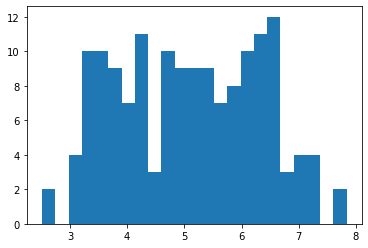

In [117]:
plt.hist(labels, bins = 23)

In [118]:
serie = pd.Series(labels)

In [119]:
serie.describe()

count    154.000000
mean       5.087088
std        1.228165
min        2.511638
25%        4.015949
50%        5.113234
75%        6.162500
max        7.837271
dtype: float64

## Agg

20220512_0326_Plate09: new\
20220531_0455_Plate10: medium\
20220527_0251_Plate27: old

In [120]:
old_plate = os.path.join(storage_path, "labels_precise", "20220527_0251_Plate27", "Img")
medium_plate = os.path.join(storage_path, "labels_precise", "20220531_0455_Plate10", "Img")
new_plate = os.path.join(storage_path, "labels_precise", "20220512_0326_Plate09", "Img")

### Presentation

Three plates are Agg

**Old plate**\
It has  points.

**New plate**\
It has  points.

**Conclusion**\


### Old plate

In [121]:
segments_new = fetch_label(old_plate)
labels = convert_segments_to_width(segments_new)

In [122]:
len(labels)

30

(array([5., 3., 2., 1., 0., 0., 0., 0., 0., 2., 0., 3., 3., 3., 1., 4., 0.,
        2., 0., 0., 0., 0., 1.]),
 array([2.07717506, 2.401223  , 2.72527093, 3.04931886, 3.37336679,
        3.69741473, 4.02146266, 4.34551059, 4.66955853, 4.99360646,
        5.31765439, 5.64170232, 5.96575026, 6.28979819, 6.61384612,
        6.93789405, 7.26194199, 7.58598992, 7.91003785, 8.23408578,
        8.55813372, 8.88218165, 9.20622958, 9.53027751]),
 <a list of 23 Patch objects>)

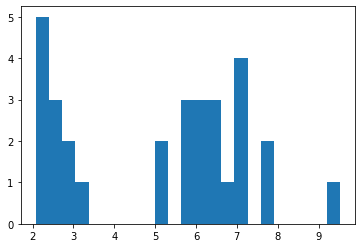

In [123]:
plt.hist(labels, bins = 23)

In [124]:
serie = pd.Series(labels)

In [125]:
serie.describe()

count    30.000000
mean      5.090694
std       2.192134
min       2.077175
25%       2.640302
50%       5.753581
75%       6.681422
max       9.530278
dtype: float64

### Young plate

In [126]:
segments_new = fetch_label(new_plate)
labels = convert_segments_to_width(segments_new)

In [127]:
len(labels)

94

(array([10., 17.,  8.,  2., 11.,  7.,  2.,  7.,  4.,  3.,  7.,  5.,  4.,
         0.,  3.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([ 2.69453614,  3.10758593,  3.52063571,  3.9336855 ,  4.34673529,
         4.75978507,  5.17283486,  5.58588465,  5.99893443,  6.41198422,
         6.82503401,  7.2380838 ,  7.65113358,  8.06418337,  8.47723316,
         8.89028294,  9.30333273,  9.71638252, 10.12943231, 10.54248209,
        10.95553188, 11.36858167, 11.78163145, 12.19468124]),
 <a list of 23 Patch objects>)

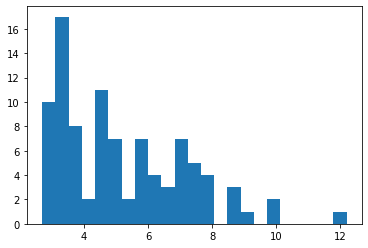

In [128]:
plt.hist(labels, bins = 23)

In [129]:
serie = pd.Series(labels)

In [130]:
serie.describe()

count    94.000000
mean      5.200225
std       1.989996
min       2.694536
25%       3.473509
50%       4.690593
75%       6.735203
max      12.194681
dtype: float64